In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import os
import matplotlib.pyplot as plt

In [8]:
start_year = 2012
end_year = 2016
start = pd.datetime(start_year, 1, 1)
end = pd.datetime(end_year, 12, 31)
code = 'AMP.AX'
code_dat = web.DataReader(code, 'yahoo', start, end)

In [9]:
ewma12 = code_dat.loc[:, 'Close'].ewm(span=12).mean()

In [10]:
ewma26 = code_dat.loc[:, 'Close'].ewm(span=26).mean()

In [11]:
diff = ewma12 - ewma26

In [12]:
ewma9 = diff.ewm(span=9).mean()

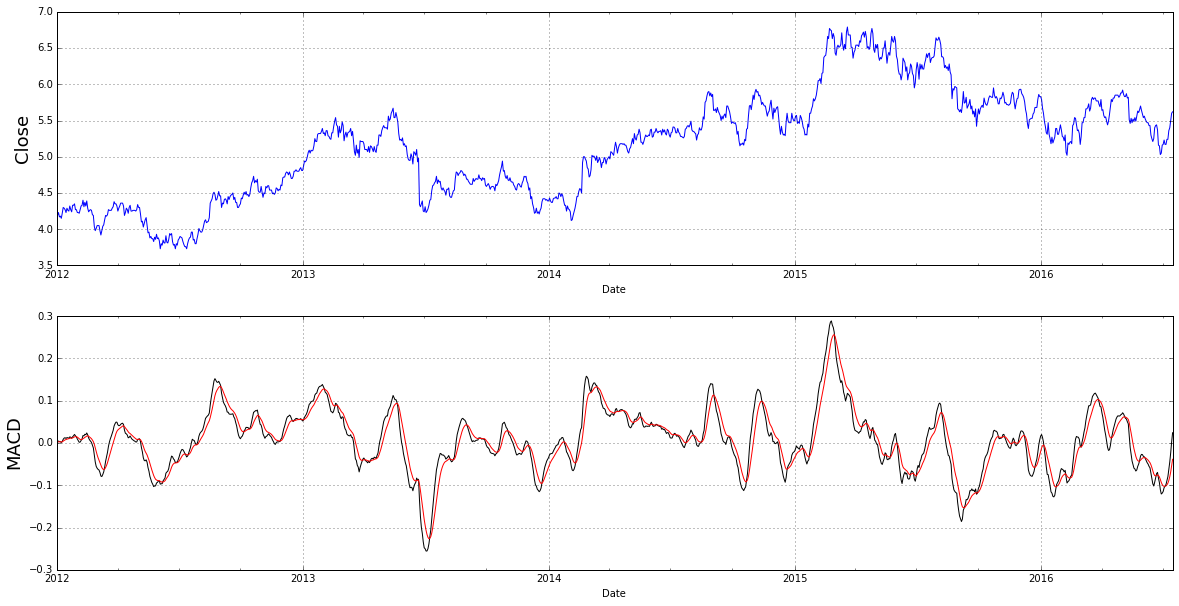

In [13]:
plt.figure(figsize=(20, 10))
ax_up = plt.subplot(211)
code_dat.loc[:, 'Close'].plot(ax=ax_up)
ax_up.set_ylabel('Close', fontsize=18)
plt.grid()
ax_down = plt.subplot(212)
diff.plot(ax=ax_down, color='k')
ewma9.plot(ax=ax_down, color='r')
ax_down.set_ylabel('MACD', fontsize=18)
plt.grid()